In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import astroML.stats

## Planning a telescope observation

- 1 = clear   
- 0 = cloudy

In [2]:
N = 10**4
observation = [0]

values_observation = [0, 1]
for i in tqdm(range(N-1)):
    if observation[i] == 0:
        observation.append(np.random.choice(values_observation, p = [0.5, 0.5]))
    if observation[i] == 1:
        observation.append(np.random.choice(values_observation, p = [0.1, 0.9]))
    
observation = np.array(observation)

100%|██████████| 9999/9999 [00:00<00:00, 32415.42it/s]


In [3]:
print('Probability of a clear day: %0.2f%%' %(len(observation[observation==1])*100/len(observation)))
print('Probability of a cloudy day: %0.2f%%' %(len(observation[observation==0])*100/len(observation)))

Probability of a clear day: 82.94%
Probability of a cloudy day: 17.06%


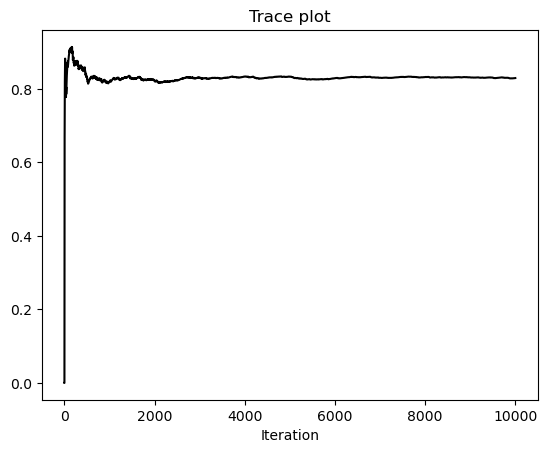

In [4]:
trace = np.cumsum(observation)/np.arange(1, len(observation) + 1)
plt.plot(trace, color = 'black')
plt.title('Trace plot')
plt.xlabel('Iteration')
plt.show()

In [5]:
burnin = 2000

print('Summary statistics with burn-in:')
print('Median = %f' %np.median(trace))
print('SigmaG = %f' %astroML.stats.sigmaG(trace))
print('Min = %f\nMax =  %f' %(min(trace), max(trace)))

print('\nSummary statistics without burn-in:')
print('Median = %f' %np.median(trace[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace[burnin:]), max(trace[burnin:])))

Summary statistics with burn-in:
Median = 0.830494
SigmaG = 0.002637
Min = 0.000000
Max =  0.914110

Summary statistics without burn-in:
Median = 0.830689
SigmaG = 0.002118
Min = 0.816190
Max =  0.833958


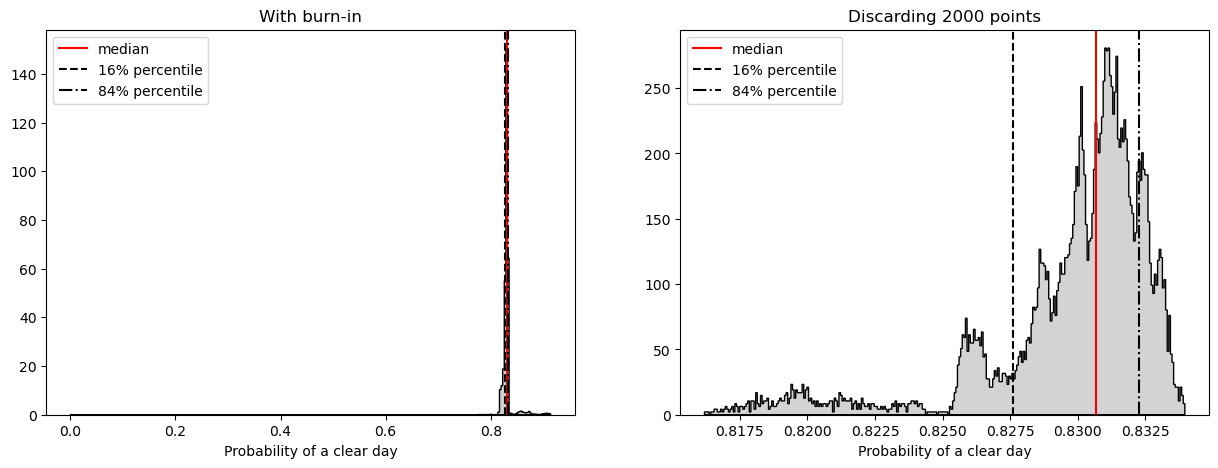

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(trace, bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[0].set_xlabel('Probability of a clear day')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace), color = 'red', label = 'median')
axs[0].axvline(np.percentile(trace, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

axs[1].hist(trace[burnin:], bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[1].set_xlabel('Probability of a clear day')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace[burnin:]), color = 'red', label = 'median')
axs[1].axvline(np.percentile(trace[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()

## Stock market

- 0 = stagnant
- 1 = bull
- 2 = bear

In [7]:
N = 10**4
stock = [0]

values_stock = [0, 1, 2]
for i in tqdm(range(N-1)):
    if stock[i] == 0:
        stock.append(np.random.choice(values_stock, p = [0.5, 0.25, 0.25]))
    if stock[i] == 1:
        stock.append(np.random.choice(values_stock, p = [0.025, 0.9, 0.075]))
    if stock[i] == 2:
        stock.append(np.random.choice(values_stock, p = [0.05, 0.15, 0.8]))

stock = np.array(stock)

100%|██████████| 9999/9999 [00:00<00:00, 31849.74it/s]


In [8]:
print('Probability of stagnant market: %0.2f%%' %(len(stock[stock==0])*100/len(stock)))
print('Probability of bull market: %0.2f%%' %(len(stock[stock==1])*100/len(stock)))
print('Probability of bear market: %0.2f%%' %(len(stock[stock==2])*100/len(stock)))

Probability of stagnant market: 7.07%
Probability of bull market: 63.34%
Probability of bear market: 29.59%


In [9]:
stock_stagnant = np.copy(stock)
stock_stagnant[stock_stagnant == 0] = -1
stock_stagnant[(stock_stagnant == 1) | (stock_stagnant == 2)] = 0
stock_stagnant[stock_stagnant == -1] = 1
trace_stagnant = np.cumsum(stock_stagnant)/np.arange(1, len(stock_stagnant) + 1)

stock_bull = np.copy(stock)
stock_bull[stock_bull == 2] = 0
trace_bull = np.cumsum(stock_bull)/np.arange(1, len(stock_bull) + 1)

stock_bear = np.copy(stock)
stock_bear[stock_bear == 1] = 0
stock_bear[stock_bear == 2] = 1
trace_bear = np.cumsum(stock_bear)/np.arange(1, len(stock_bear) + 1)

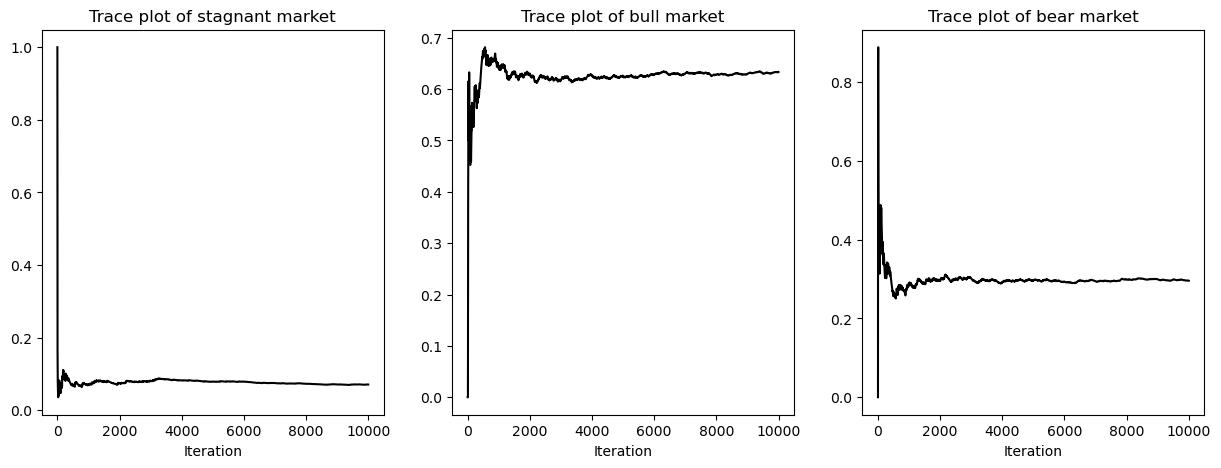

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(trace_stagnant, color = 'black')
axs[0].set_title('Trace plot of stagnant market')
axs[0].set_xlabel('Iteration')

axs[1].plot(trace_bull, color = 'black')
axs[1].set_title('Trace plot of bull market')
axs[1].set_xlabel('Iteration')

axs[2].plot(trace_bear, color = 'black')
axs[2].set_title('Trace plot of bear market')
axs[2].set_xlabel('Iteration')

plt.show()

#### Stagnant market

In [11]:
burnin = 2000

print('Summary statistics with burn-in:')
print('Median = %f' %np.median(trace_stagnant))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_stagnant))
print('Min = %f\nMax =  %f' %(min(trace_stagnant), max(trace_stagnant)))

print('\nSummary statistics without burn-in:')
print('Median = %f' %np.median(trace_stagnant[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_stagnant[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace_stagnant[burnin:]), max(trace_stagnant[burnin:])))

Summary statistics with burn-in:
Median = 0.076026
SigmaG = 0.005449
Min = 0.035714
Max =  1.000000

Summary statistics without burn-in:
Median = 0.077196
SigmaG = 0.004974
Min = 0.069468
Max =  0.087115


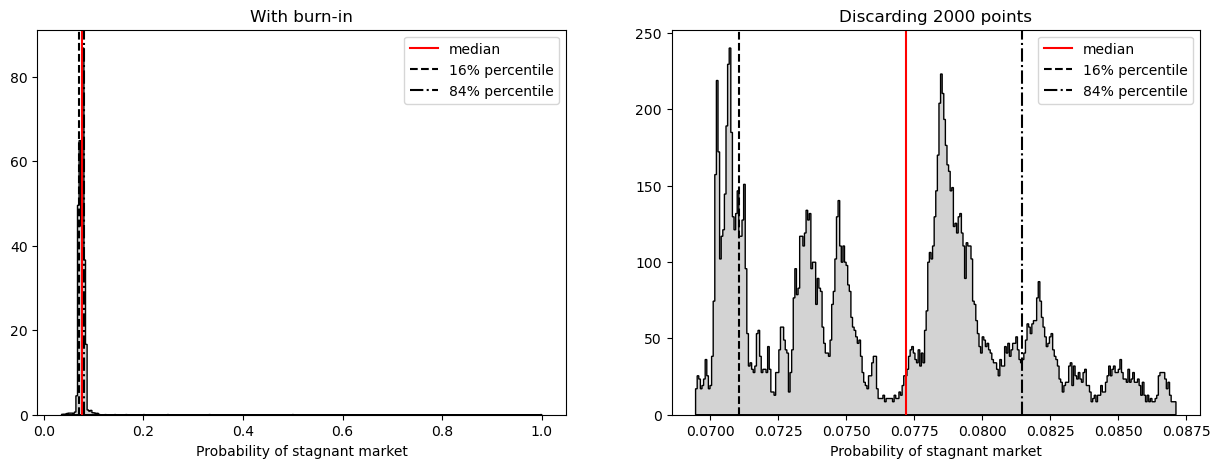

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(trace_stagnant, bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[0].set_xlabel('Probability of stagnant market')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace_stagnant), color = 'red', label = 'median')
axs[0].axvline(np.percentile(trace_stagnant, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace_stagnant, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

axs[1].hist(trace_stagnant[burnin:], bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[1].set_xlabel('Probability of stagnant market')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace_stagnant[burnin:]), color = 'red', label = 'median')
axs[1].axvline(np.percentile(trace_stagnant[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace_stagnant[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()

#### Bull market

In [13]:
burnin = 2000

print('Summary statistics with burn-in:')
print('Median = %f' %np.median(trace_bull))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bull))
print('Min = %f\nMax =  %f' %(min(trace_bull), max(trace_bull)))

print('\nSummary statistics without burn-in:')
print('Median = %f' %np.median(trace_bull[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bull[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace_bull[burnin:]), max(trace_bull[burnin:])))

Summary statistics with burn-in:
Median = 0.627667
SigmaG = 0.005966
Min = 0.000000
Max =  0.681574

Summary statistics without burn-in:
Median = 0.627301
SigmaG = 0.005472
Min = 0.612135
Max =  0.634681


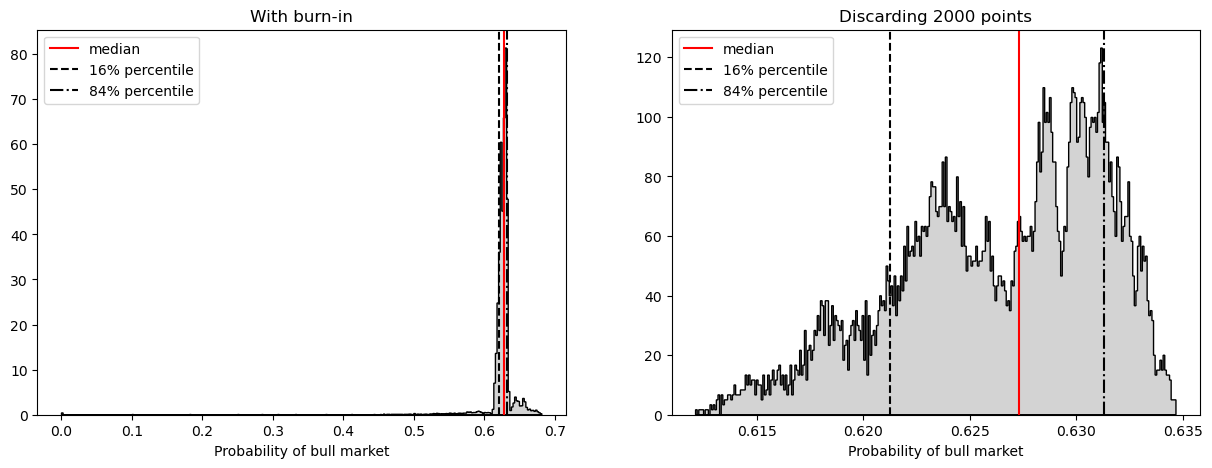

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(trace_bull, bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[0].set_xlabel('Probability of bull market')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace_bull), color = 'red', label = 'median')
axs[0].axvline(np.percentile(trace_bull, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace_bull, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

axs[1].hist(trace_bull[burnin:], bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[1].set_xlabel('Probability of bull market')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace_bull[burnin:]), color = 'red', label = 'median')
axs[1].axvline(np.percentile(trace_bull[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace_bull[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()

#### Bear market

In [15]:
burnin = 2000

print('Summary statistics with burn-in:')
print('Median = %f' %np.median(trace_bear))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bear))
print('Min = %f\nMax =  %f' %(min(trace_bear), max(trace_bear)))

print('\nSummary statistics without burn-in:')
print('Median = %f' %np.median(trace_bear[burnin:]))
print('SigmaG = %f' %astroML.stats.sigmaG(trace_bear[burnin:]))
print('Min = %f\nMax =  %f' %(min(trace_bear[burnin:]), max(trace_bear[burnin:])))

Summary statistics with burn-in:
Median = 0.296692
SigmaG = 0.003137
Min = 0.000000
Max =  0.888889

Summary statistics without burn-in:
Median = 0.296869
SigmaG = 0.002739
Min = 0.288973
Max =  0.311377


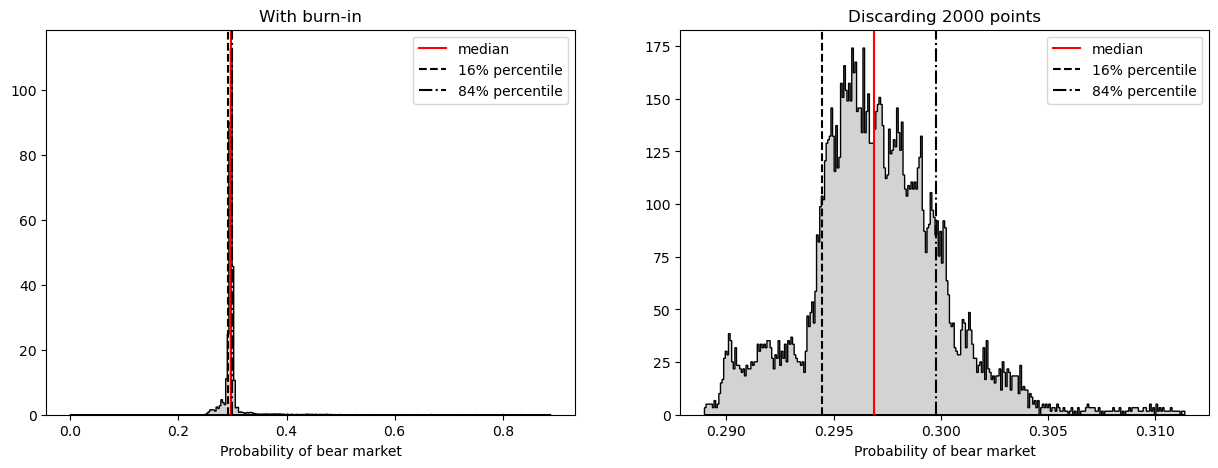

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].hist(trace_bear, bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[0].set_xlabel('Probability of bear market')
axs[0].set_title('With burn-in')
axs[0].axvline(np.median(trace_bear), color = 'red', label = 'median')
axs[0].axvline(np.percentile(trace_bear, q=16), color = 'black', ls = '--', label = '16% percentile')
axs[0].axvline(np.percentile(trace_bear, q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[0].legend()

axs[1].hist(trace_bear[burnin:], bins = 300, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[1].set_xlabel('Probability of bear market')
axs[1].set_title('Discarding %i points' %(burnin))
axs[1].axvline(np.median(trace_bear[burnin:]), color = 'red', label = 'median')
axs[1].axvline(np.percentile(trace_bear[burnin:], q=16), color = 'black', ls = '--', label = '16% percentile')
axs[1].axvline(np.percentile(trace_bear[burnin:], q=84), color = 'black', ls = '-.', label = '84% percentile')
axs[1].legend()

plt.show()